<a href="https://colab.research.google.com/github/jungddddd/ML-/blob/main/2)%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B801_simple_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 단순선형회귀분석

- #### CRIM 변수로 CRIM 이 PRICE 에 영향을 주는지 확인
    - Boston 주택 가격데이터 이용

[참고]

- boston data가 datasets 에서 삭제가 되었습니다.
- 데이터를 url을 통해 불러와 실습하겠습니다.
- 영상과 데이터를 불러오는 방식은 다르지만 동일한 데이터이니 큰 문제가 되지는 않을겁니다.
- culumn 명이 소문자이니 주의하세요.
- 강의자료에는 수정해 넣어두었습니다. 참고바랍니다.

In [ ]:
# 데이터 분석을 위한 기본 모듈 pandas 와 numpy 불러오기
import pandas as pd
import numpy as np

In [ ]:
# boston 데이터 불러오기
# URL 이용
url="https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv"
boston=pd.read_csv(url)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# boston 데이터의 column 명 확인
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
# target 변수인 medv를 price 로 변경
boston_df=boston.rename(columns={"medv":"price"})   #타겟변수 제외하고 호출함
boston_df.head()       #위부터 5개 확인가능

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- #### price(target) ~ crim 선형회귀분석

In [ ]:
boston_df.info()           #연속형임 확인가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
boston_df.shape

(506, 14)

In [ ]:
#위 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
crim_price=boston_df[['crim','price']]       #crime변수가 price에 영향을 주는지 확인
crim_price.head()

,crim,price
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2


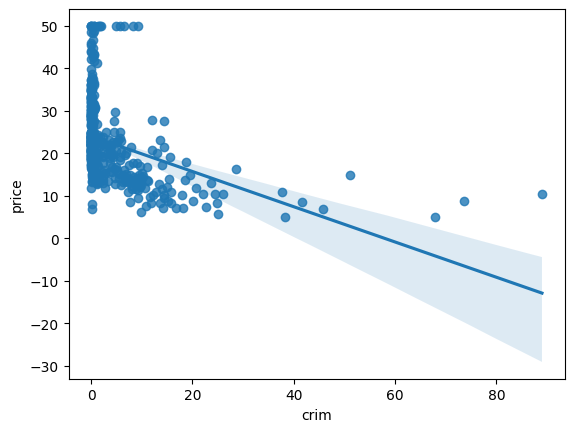

In [ ]:
sns.regplot(x="crim",y="price",data=crim_price)
plt.show()              #산점도 / 실제데이터직선

### price(target)+crim 선형회귀분석

In [ ]:
price=boston_df[['price']]
crim=boston_df[['crim']]

In [ ]:
import statsmodels.api as sm

In [ ]:
crim1=sm.add_constant(crim,has_constant='add')   #상수항 추가한다는 뜻

In [ ]:
reg=sm.OLS(price,crim1)        #OLS 잔차제곱합 최소화하는 선형회귀추정방식임.선형회귀분석하면 보통 사용
fitted_model=reg.fit()

In [ ]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.17e-19
Time:                        12:15:39   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
crim          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### y_hat=beta0 + beta1 * X (회귀식) 계산

In [ ]:
fitted_model.params

const    24.033106
crim     -0.415190
dtype: float64

In [ ]:
len(np.dot(crim1,fitted_model.params))  #행렬계산

506

In [ ]:
pred=fitted_model.predict(crim1)

In [ ]:
pred     #함수로 예측값 확인

0      24.030482
1      24.021767
2      24.021776
3      24.019666
4      24.004437
         ...    
501    24.007103
502    24.014311
503    24.007879
504    23.987605
505    24.013422
Length: 506, dtype: float64

In [ ]:
pred-np.dot(crim1,fitted_model.params)   #행렬로계산한값과 함수로 예측한값 차이가있는지 확인하는 식

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

- #### 시각화

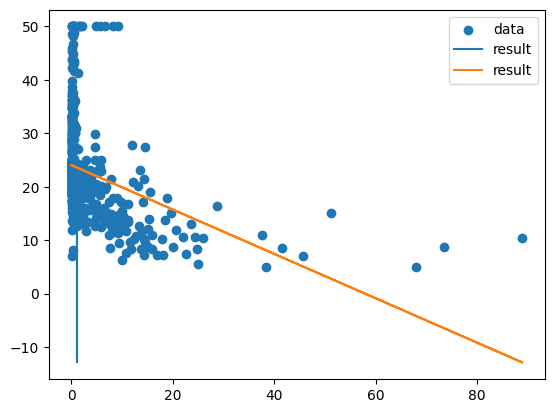

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(crim,price,label="data")
plt.plot(crim1,pred,label="result")
plt.legend()
plt.show()                #우리가 예측한 직선     / 위에 실제직선 그래프와 비교하여 얼마나 직선기울기 유사한지 확인해보기

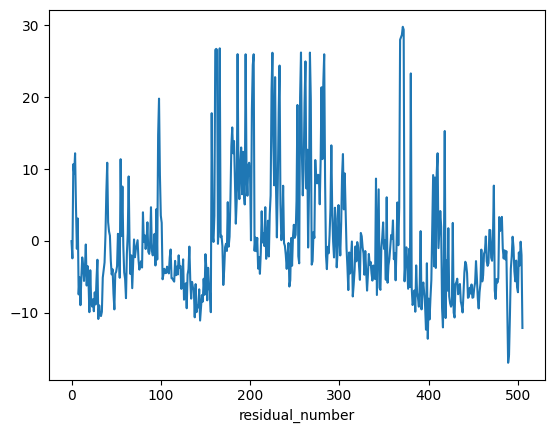

In [ ]:
#잔차그래프(실제값과 예측값의 차이를 보여주는 그래프)
fitted_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [ ]:
#잔차의 합 계산해보기
sum(fitted_model.resid)

-3.693045869113121e-12

### 1. RM변수와 LSTAT변수로 price를 예측하도록 각각 단순선형회귀분석 후 결과 분석
- Boston 주택 가격데이터 이용

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# boston 데이터 불러오기  #데이터준비
# url 이용
url='https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
boston = pd.read_csv(url)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# boston 데이터의 column 명 확인
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
# target 변수인 medv를 price 로 변경
boston_df=boston.rename(columns={"medv":"price"})
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#회귀분석하기
import statsmodels.api as sm

In [ ]:
x_data=boston_df[['crim','rm','lstat']]       #3개변수만 가져와서 묶어줌
x_data.head()

,crim,rm,lstat
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [ ]:
price=boston_df[['price']]

In [ ]:
x_data1=sm.add_constant(x_data,has_constant='add')     #독립변수 상수항 고려 / 독립변수 묶어줌

In [ ]:
multi_model=sm.OLS(price,x_data1)
fitted_multi_model=multi_model.fit()

In [ ]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          1.01e-112
Time:                        13:12:19   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2811      1.583     -0.809      0.419      -4.391       1.829
const         -1.2811      1.583     -0.809      0.419      -4.391       1.829
crim          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
rm             5.2170      0.442     11.802      0.000       4.348       6.085
lstat         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                     2.87e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 단순선형회귀모델의 회귀계수와 비교

### 상관계수/산점도를 통해 다중공선성 확인

In [ ]:
x_data.corr()   #crim,rm,istat변수 들어가있음

,const,crim,rm,lstat
const,NaN,NaN,NaN,NaN
crim,NaN,1.000000,-0.219247,0.455621
rm,NaN,-0.219247,1.000000,-0.613808
lstat,NaN,0.455621,-0.613808,1.000000


In [ ]:
x_data.head()  #header 데이터 열이름? 확인가능

,const,crim,rm,lstat
0,1.0,0.00632,6.575,4.98
1,1.0,0.02731,6.421,9.14
2,1.0,0.02729,7.185,4.03
3,1.0,0.03237,6.998,2.94
4,1.0,0.06905,7.147,5.33


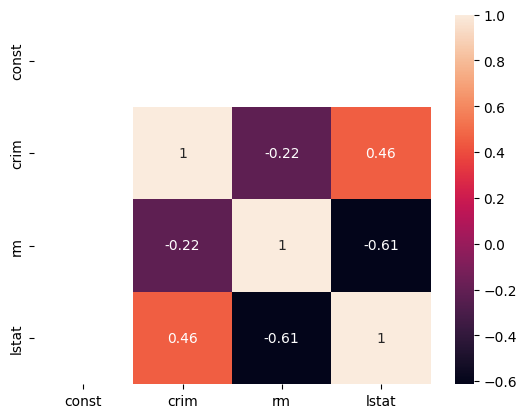

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(x_data.corr(),annot=True)  #matric 형태로 나타냄/annot넣어주면 상관계수값 보여짐/ 양으로 갈수록 밝아지고 음으로갈수록 색 어두워짐
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

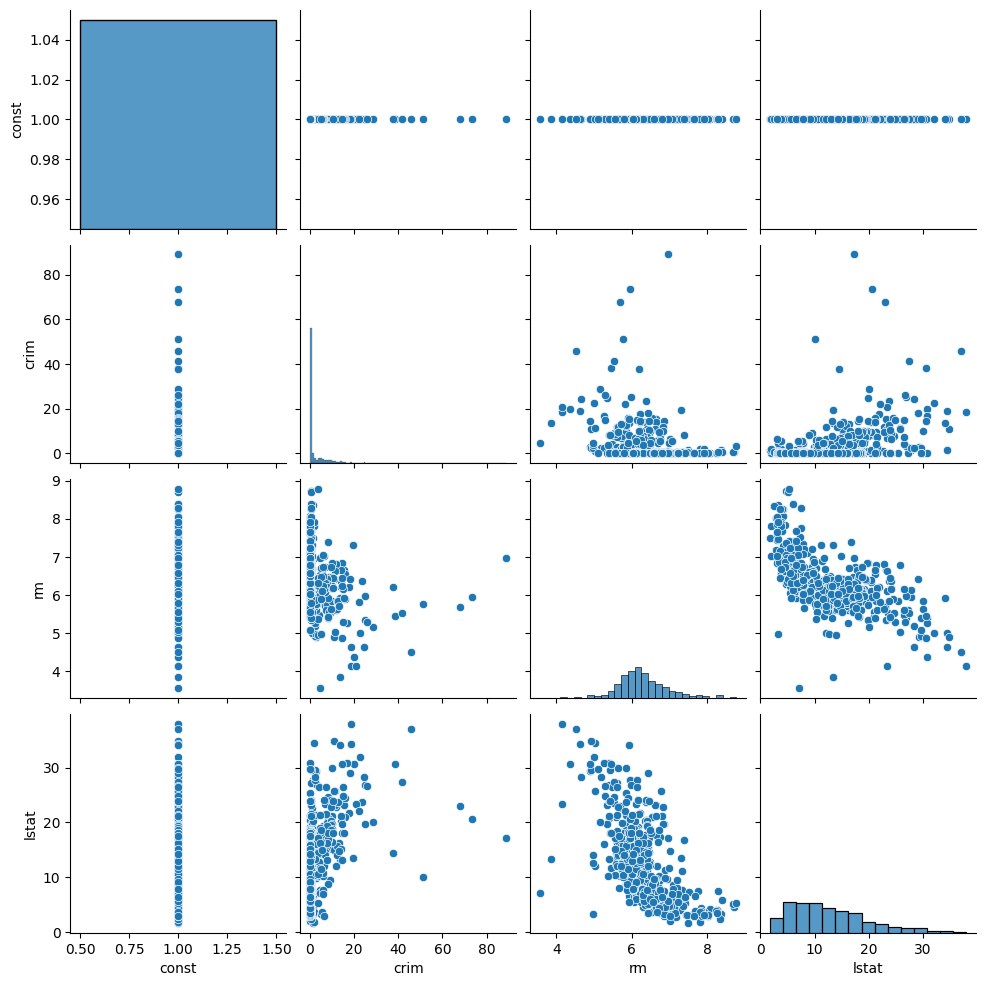

In [ ]:
sns.pairplot(x_data)

## VIF를 통한 다중공선성 확인